In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("car_accidents.csv")  #Cargar los datos...
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08/02/16 0:37,08/02/16 6:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08/02/16 5:56,08/02/16 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08/02/16 6:15,08/02/16 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08/02/16 6:15,08/02/16 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08/02/16 6:51,08/02/16 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,A-2717094,2,25/02/16 15:50,25/02/16 21:50,41.65404,-85.70526,41.65458,-85.58601,6.156,At County Road 300 W - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
495,A-2717095,2,25/02/16 15:50,25/02/16 21:50,41.65458,-85.58601,41.65417,-85.70476,6.130,At County Road 300 W - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
496,A-2717096,2,25/02/16 15:52,25/02/16 21:52,41.39465,-81.65326,41.39413,-81.65326,0.036,At Rockside Rd/Exit 155 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
497,A-2717097,2,25/02/16 15:59,25/02/16 21:59,41.06211,-81.53053,41.06239,-81.52229,0.430,Between Main St/Broadway/Exit 22 and Wolf Ledg...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [28]:
data = df[["Humidity(%)","Severity"]]
data = data.dropna(axis = 0, how = 'any')
kmeans = KMeans(n_clusters=4).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[63.33333333  2.63963964]
 [93.88666667  2.69333333]
 [45.71621622  2.60810811]
 [81.01265823  2.75949367]]


In [29]:
cls = kmeans.predict(data)

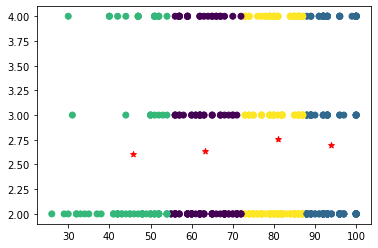

In [30]:
plt.scatter(data["Humidity(%)"],data["Severity"],c=cls)
for i in range(len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1],marker="*",c="red")